# Section \#1: Centralized Algorithms

## Section \#1.1: LINEAR REGRESSION

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from data_load import load
import scipy.io as io
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('regression_train.csv')
    X_val, y_val = load('regression_val.csv')
    X_test, y_test = load('regression_test.csv')
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Validation data shape: ',X_val.shape)
print('Validation target shape: ',y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (20, 1)
Train target shape:  (20,)
Validation data shape:  (20, 1)
Validation target shape:  (20,)
Test data shape:  (20, 1)
Test target shape:  (20,)


### Visualization
What do you observe? For example, can you make an educated guess on the effectiveness of linear regression in predicting the data?

The training and testing data seems like generated according to some trigonometry function 
so we don’t expect the linear regression to behave well on this dataset.

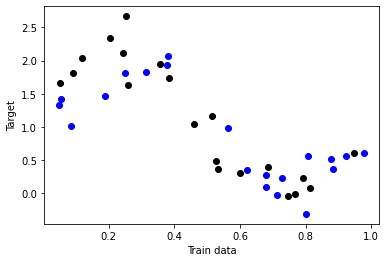

In [3]:
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

### Training Linear Regression

In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

### Linear regression

For the GD solution, 

- the loss we get with initialization w to all zeros is [2.01169237]
- the gradient of the first iteration is [[-2.2602119 ][-0.67366233]]
- the final value of the loss function is [0.27469573]
- the value of the weight w is [[ 1.91573585][-1.74358989]]


Try different learning rates, batch sizes (e.g. full, stochastic), and number of iterations. What do you find works best for producing the best loss function value?

optimal parameters combination is: 
- eta = 0.01 
- batch_size = 20 
- num_iters = 15000
- optimal loss is [0.19562882]
- optimal weights is [[ 2.44640699][-2.81635338]]

For the close form solution,

- the optimal weights w is [[ 2.44640709][-2.81635359]]
- the loss is [0.19562882]

Compare the best GD solution with the closed form solution




In [4]:
from Regression import Regression

In [5]:
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print(loss)
print(grad)
##

[2.01169237]
[[-2.2602119 ]
 [-0.67366233]]


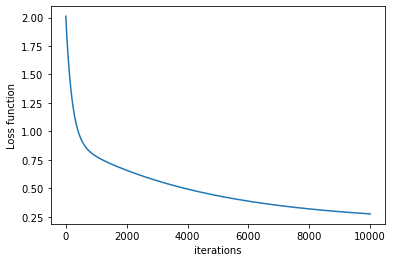

[[ 1.91573585]
 [-1.74358989]]
[0.27469573]


In [6]:
## Complete train_LR function in Regression.py file 
regression = Regression(m=1, reg_param=0)
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=20, num_iters=10000) # original set as 10000
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print(loss_history[9999])

In [7]:
# TODO: select the best combination of hyperparameters
# play with
# stepsize: eta
# batchsize: batch_size
# number of iterations: num_iters

m = 1
opt_loss = float("inf")
opt_w = np.zeros(m+1)
opt_param_comb = {}

eta_ls = [1e-2, 1e-3] # learning rates list
batch_size_ls = [1, 5, 10, 15, 20]
num_iters_ls = [2500, 5000, 10000, 15000]

for eta in eta_ls:
    for batch_size in batch_size_ls:
        for num_iters in num_iters_ls:
            regression = Regression(m=m, reg_param=0)
            loss_history, w = regression.train_LR(X_train,y_train, eta=eta,batch_size=batch_size, num_iters=num_iters)

            # calculate the loss on the whole training dataset
            # using the final weight
            y_pred = regression.predict(X_train)
            y_true = y_train.reshape(-1,1)
            loss = ((y_pred - y_true).T @ (y_pred - y_true) / X_train.shape[0])[0]
            
            if loss < opt_loss:
                opt_loss = loss
                opt_w = w
                opt_param_comb['eta'] = eta
                opt_param_comb['batch_size'] = batch_size
                opt_param_comb['num_iters'] = num_iters
                
print('optimal parameters combination is: \neta = {} \nbatch_size = {} \nnum_iters = {}' \
        .format(opt_param_comb['eta'], opt_param_comb['batch_size'], opt_param_comb['num_iters']))
print('optimal loss is', opt_loss)
print('optimal weights is', opt_w)


optimal parameters combination is: 
eta = 0.01 
batch_size = 20 
num_iters = 15000
optimal loss is [0.19562882]
optimal weights is [[ 2.44640699]
 [-2.81635338]]


In [8]:
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print(loss_2)
print(w_2)

[0.19562882]
[[ 2.44640709]
 [-2.81635359]]


### Polynomial regression
Plot the figures and values of the loss function for the case m = 3.

for the GD solution, 

- the loss we get with initialization w to all zeros is [2.01169237]
- the gradient of the first iteration is [[-2.2602119 ][-0.67366233][-0.28489868][-0.15581189]]
- the final value of the loss function is [0.23928099]
- the value of the weight w is [[ 1.95302357][-0.86903243][-1.0001872 ][-0.72779719]]

for the closed form solution,

- the optimal weights w is [[ 1.95302357][-0.86903243][-1.0001872 ][-0.72779719]]
- the loss is [0.05966745]

Compare the best GD solution with the closed form solution


In [9]:
## for m = 3
regression = Regression(m=3, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print(loss)
print(grad)
##

[2.01169237]
[[-2.2602119 ]
 [-0.67366233]
 [-0.28489868]
 [-0.15581189]]


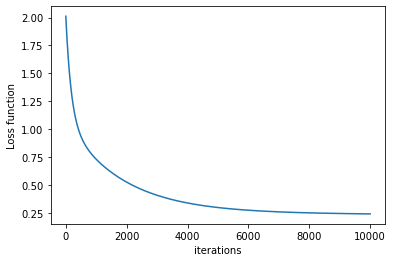

[[ 1.95302357]
 [-0.86903243]
 [-1.0001872 ]
 [-0.72779719]]
[0.23928099]


In [10]:
## for m = 3
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=20, num_iters=10000) # original set as 10000
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print(loss_history[9999]) # The final value of the loss function

In [11]:
## for m = 3
loss_3, w_3 = regression.closed_form(X_train, y_train)
print(loss_3)
print(w_3)

[0.05966745]
[[  1.22314252]
 [ 10.64961621]
 [-34.08367975]
 [ 23.5902309 ]]


In [12]:
# TODO: select the best combination of hyperparameters
# play with
# stepsize: eta
# batchsize: batch_size
# number of iterations: num_iters

m = 3 # The degree of the polynomials
opt_loss = float("inf")
opt_w = np.zeros(m+1)
opt_param_comb = {}

eta_ls = [5e-1, 1e-1] # learning rates list
batch_size_ls = [1, 5, 10, 15, 20]
num_iters_ls = [30000, 40000, 50000]
for eta in eta_ls:
    for batch_size in batch_size_ls:
        for num_iters in num_iters_ls:
            regression = Regression(m=m, reg_param=0)
            loss_history, w = regression.train_LR(X_train,y_train, eta=eta,batch_size=batch_size, num_iters=num_iters)
            
            # calculate the loss on the whole training dataset
            # using the final weight
            y_pred = regression.predict(X_train)
            y_true = y_train.reshape(-1,1)
            loss = ((y_pred - y_true).T @ (y_pred - y_true) / X_train.shape[0])[0]
            
            
            if loss < opt_loss:
                opt_loss = loss
                opt_w = w
                opt_param_comb['eta'] = eta
                opt_param_comb['batch_size'] = batch_size
                opt_param_comb['num_iters'] = num_iters


print('optimal parameters combination is: \neta = {} \nbatch_size = {} \nnum_iters = {}' \
        .format(opt_param_comb['eta'], opt_param_comb['batch_size'], opt_param_comb['num_iters']))

print('optimal loss is', opt_loss)
print('optimal weights is', opt_w)

optimal parameters combination is: 
eta = 0.5 
batch_size = 20 
num_iters = 50000
optimal loss is [0.0598055]
optimal weights is [[  1.2689087 ]
 [ 10.18251576]
 [-32.96326121]
 [ 22.84428624]]


### Overfitting

The polynomial model of degree 10 best fits the data, but it can be observed from the plot that although it perfectly fits the training data, it causes overfitting, which deteriorate much on the test set, thus, we'd better choose the model between degree 3 to degree 5 to balance this trade-off.

The best polynomial regression model on the training data is 10


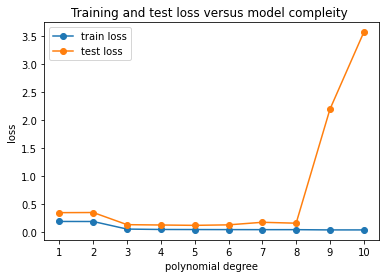

In [14]:
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #

# determine the best polynomial regression model on the training data
opt_train_loss = float("inf")
opt_degree = 1

for m in range(1,11):
    
    regression = Regression(m=m, reg_param=0)
    train_loss_val, w = regression.closed_form(X_train, y_train)
    
    # calculate the test loss
    y_test_pred = regression.predict(X_test)
    y_test = y_test.reshape(-1,1)
    test_loss_val = ((np.transpose(y_test_pred - y_test) @ (y_test_pred - y_test)) / X_test.shape[0])[0] 
    
    train_loss[m - 1] = train_loss_val
    test_loss[m - 1] = test_loss_val
    
    if train_loss_val < opt_train_loss:
        opt_train_loss = train_loss_val
        opt_degree = m
        

print('The best polynomial regression model on the training data is', opt_degree)
    
# Generate a plot depicting how loss varies with model complexity (polynomial degree). 
# You should generate a single plot with both training and test error.
# Which degree polynomial would you say best fits the data?
# Use your plot to justify your answer.

# plot the figure

degree = np.arange(1,11)

plt.plot(degree, train_loss, 'o-', label = "train loss")
plt.plot(degree, test_loss, 'o-', label = "test loss")

plt.xlabel('polynomial degree')
plt.ylabel('loss')

# Set a title of the current axes.
plt.title('Training and test loss versus model compleity ')

# show a legend on the plot
plt.legend()

plt.xticks(degree)

# Display a figure.
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #



### Regularization

we use m=3 with regularizer, re_param = 0.01 to repeat(e)-(f)

For the GD slution, 

- the final value of the loss function using GD is [0.27233786]
- the value of the weight w is [[ 1.91267791][-0.83048671][-0.96516108][-0.70714312]]\

For the closed form solution,

- the weights is [[ 2.22033337][-1.7855083 ][-1.25312518][ 0.46296531]]
- the loss is [0.24633436]


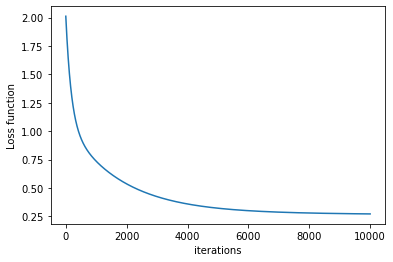

[[ 1.91267791]
 [-0.83048671]
 [-0.96516108]
 [-0.70714312]]
[0.27233786]


In [15]:
## we use m = 3, reg_params = 0.01
regression = Regression(m=3, reg_param=0.01)
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=20, num_iters=10000) # original set as 10000
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print(loss_history[9999]) # The final value of the loss function

In [19]:
# TODO: select the best combination of hyperparameters
# play with
# stepsize: eta
# batchsize: batch_size
# number of iterations: num_iters

m = 3 # The degree of the polynomials
reg_param = 0.01
opt_loss = float("inf")
opt_w = np.zeros(m+1)
opt_param_comb = {}

eta_ls = [6e-1, 5e-1, 1e-1, 1e-2] # learning rates list
batch_size_ls = [1, 5, 10, 15, 20]
num_iters_ls = [40000, 50000, 55000]
for eta in eta_ls:
    for batch_size in batch_size_ls:
        for num_iters in num_iters_ls:
            
            regression = Regression(m=m, reg_param=reg_param)
            loss_history, w = regression.train_LR(X_train,y_train, eta=eta,batch_size=batch_size, num_iters=num_iters)
            
            # calculate the loss on the whole training dataset
            # using the final weight
            y_pred = regression.predict(X_train)
            y_true = y_train.reshape(-1,1)
            loss = ((y_pred - y_true).T @ (y_pred - y_true) / X_train.shape[0])[0] + (reg_param / 2) * (w.T @ w)[0]
            
            
            if loss < opt_loss:
                opt_loss = loss
                opt_w = w
                opt_param_comb['eta'] = eta
                opt_param_comb['batch_size'] = batch_size
                opt_param_comb['num_iters'] = num_iters


print('optimal parameters combination is: \neta = {} \nbatch_size = {} \nnum_iters = {}' \
        .format(opt_param_comb['eta'], opt_param_comb['batch_size'], opt_param_comb['num_iters']))

print('optimal loss is', opt_loss)
print('optimal weights is', opt_w)

optimal parameters combination is: 
eta = 0.1 
batch_size = 20 
num_iters = 40000
optimal loss is [0.24633436]
optimal weights is [[ 2.22033337]
 [-1.7855083 ]
 [-1.25312518]
 [ 0.46296531]]


In [334]:
## for m = 3 with regularizer
loss_3_reg, w_3_reg = regression.closed_form(X_train, y_train)
print(loss_3_reg)
print(w_3_reg)

[0.24633436]
[[ 2.22033337]
 [-1.7855083 ]
 [-1.25312518]
 [ 0.46296531]]


The regularization coefficient minimizes the test loss is 1e-06


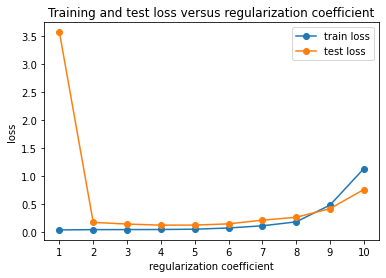

In [21]:
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for lambda from set of values given.
# ================================================================ #

m = 10 # degree 10 polynomial model

reg_ls = np.logspace(-8, 0, 9, endpoint=True)
reg_ls = [0] + list(reg_ls)

# determine the best reg_param that minimize the error for a degree 10 polynomial
opt_test_loss = float("inf")
opt_reg = 0.0

for i in range(0,10):
    reg = reg_ls[i]
    regression = Regression(m=m, reg_param=reg)
    train_loss_val, w = regression.closed_form(X_train, y_train)
    
    # calculate the test loss
    y_test_pred = regression.predict(X_test)
    y_test = y_test.reshape(-1,1)
    test_loss_val = ((np.transpose(y_test_pred - y_test) @ (y_test_pred - y_test)) / X_test.shape[0])[0] + \
                        (reg / 2) * (w.T @ w)[0]
    
    train_loss[i] = train_loss_val
    test_loss[i] = test_loss_val
    
    if test_loss_val < opt_test_loss:
        opt_test_loss = test_loss_val
        opt_reg = reg
        

print('The regularization coefficient minimizes the test loss is', opt_reg)
    
# Generate a plot depicting how loss varies with model complexity (polynomial degree). 
# You should generate a single plot with both training and test error.
# Which degree polynomial would you say best fits the data?
# Use your plot to justify your answer.

# plot the figure

log_scale = np.arange(1,11)

plt.plot(log_scale, train_loss, 'o-', label = "train loss")
plt.plot(log_scale, test_loss, 'o-', label = "test loss")

plt.xlabel('regularization coefficient')
plt.ylabel('loss')

# Set a title of the current axes.
plt.title('Training and test loss versus regularization coefficient')

# show a legend on the plot
plt.legend()

plt.xticks(log_scale)

# Display a figure.
plt.show()


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Section \#1.2: Binary Classification 

Please follow our instructions in the same order to solve the binary classification problem.

Please print out the entire results and codes when completed.

### Visualization
What is the dimensions of $X_{train}$ and $X_{test}$?

- The dimension of $X_{train}$ is (5000, 784)
- The dimension of $X_{test}$ is (500, 784)

In [22]:
"""
Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
"""
train = io.loadmat('mnist_train')
test = io.loadmat('mnist_test')
X_train = train['X_train']
y_train = np.transpose(train['y_train'])
X_test = test['X_test']
y_test = np.transpose(test['y_test'])

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)


Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


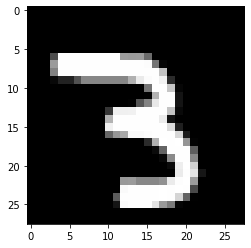

label is 3


In [23]:
# To Visualize a point in the dataset
index = 4000
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('Sample.pdf')
if y_train[index] == 1:
    label = 3
else:
    label = 2
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

### Perceptron

Let the maximum number of iterations of the Algorithm numiter = N.

Does Perceptron Algorithm converge? prove your claim.

- From the history of the loss function we know that the perceptron will never converge on this dataset since the , this implies that these two classes are not linearly seperable. This implies that if we add to the maximum iterations, the training loss will not reduce to zero.

What is the final value of the loss function and the value l2 of the weight ||w||2?

- The final value of the loss function is 0.0328

- The squared L2 norm of the weight is [6.62814956e+08]

The final value of the loss function is 0.0328
The squared L2 norm of the weights is [6.62814956e+08]


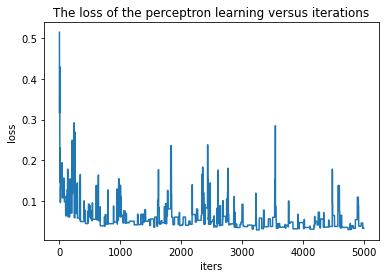

In [24]:
N = X_train.shape[0] # Number of data point
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d,1))
# ================================================================ #
# YOUR CODE HERE:
# Implement the perceptron Algorithm and compute the number of misclassified points at each training step
# ================================================================ #

max_iters = N

for i in range(0, N):
    
    x_sample = X_train[i].reshape((-1, 1))
    y_sample = y_train[i]
    
    y_pred = np.sign(W.T @ x_sample)[0]
    
    if y_sample * y_pred <= 0:      # update weights
        W = W + (y_sample * x_sample) 
    
    # compute the percentage of misclassified points in the training dataset
    y_pred_total = np.sign(X_train @ W)
    num_missed = np.sum(y_train != y_pred_total)
    loss_hist.append(num_missed / N)
    
print('The final value of the loss function is', loss_hist[-1])
print('The squared L2 norm of the weights is', (W.T @ W)[0])

# Plot the history of he loss function

plt.plot(loss_hist)
plt.xlabel('iters')
plt.ylabel('loss')
plt.title('The loss of the perceptron learning versus iterations')
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [25]:
# Compute the percentage of misclassified points in the test data for perceptron
y_pred_test = np.sign(X_test @ W)
num_missed = np.sum(y_test != y_pred_test)
print('The percentage of misclassified points in the test data for perceptron is {}%.' \
      .format(100 * num_missed / (X_test.shape[0])))

The percentage of misclassified points in the test data for perceptron is 4.4%.


## Train Logistic Regression

In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent. 

### Logistic Regression
What is the final value of the loss function and the value L2 of the weight ||w||2?

- The final value of the loss function is 0.04278378895948997

- The squared L2 norm of the weight is 0.00030104046329923495

#### Logistic Regression and Batch Size

Which batch size gives the minimum test error?

- Batch size = 50 gives the minimum test error

In [26]:
from Logistic import Logistic

In [27]:
# Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
78885.26903007003


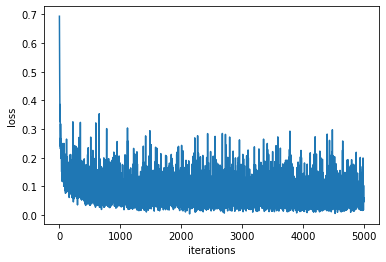

0.00029630809248451967
0.06076905873624883


In [28]:
# Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)

fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()
fig.savefig('LR_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[4999])

In [29]:
# Complete predict function in Logisitc.py file and compute the percentage of misclassified points in the test data
y_pred_test = logistic.predict(X_test)
num_missed = np.sum(y_test != y_pred_test)
print('The percentage of misclassified points in the test data for logistic regression is {}%.' \
      .format(100 * num_missed / (X_test.shape[0])))

The percentage of misclassified points in the test data for logistic regression is 2.4%.


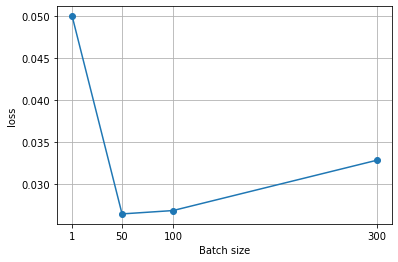

In [30]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,10):
    for m in range(0,len(Batch)):
        batch_size = Batch[m]
        num_iters = int(np.ceil(8000 / batch_size))
        
        logistic = Logistic(d=d, reg_param=0)
        loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-5, batch_size=batch_size, num_iters=num_iters)
        
        # compute the test error
        y_pred_test = logistic.predict(X_test)
        num_missed = np.sum(y_test != y_pred_test)
        test_err[m] += (num_missed / X_test.shape[0])

test_err = test_err / 10

# plot the test error as a function of the batch size.
my_xticks = ['1','50','100','300']
plt.ylabel('loss')
plt.xlabel('Batch size')
plt.xticks(Batch, my_xticks)
plt.plot(Batch, test_err, 'o-')
plt.grid()
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #



## Train SVM

In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

### SVM
What is the final value of the loss function and the value l2 of the weight ||w||2?
- The final value of the loss function is 0.06561583839999921

- The squared norm of the weight is 0.00020058984757440003

#### SVM and Batch Size

Which batch size gives the minimum test error?

- Batch size = 100 gives the minimum test error (This may alter.)

In [31]:
from SVM import SVM

In [32]:
# Complete loss_and_grad function in SVM.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
315541.0761202794


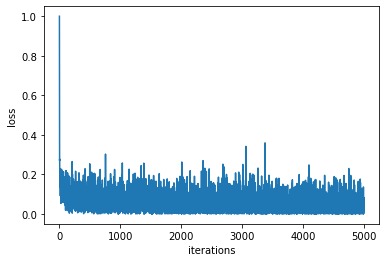

0.00020224149632320002
0.012977952400000214


In [33]:
# Complete train_svm function in SVM.py file 
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()
fig.savefig('svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[4999])

In [34]:
# Complete predict function in SVM.py file and compute the percentage of misclassified points in the test data
y_pred = svm.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err)

2.2


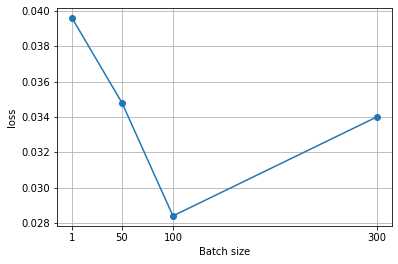

In [45]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,10):
    for m in range(0,len(Batch)):
        batch_size = Batch[m]
        num_iters = int(np.ceil(8000 / batch_size))
        
        svm = SVM(d=d, reg_param=0)
        loss_history, w = svm.train_svm(X_train,y_train, eta=1e-5, batch_size=batch_size, num_iters=num_iters)
        
        # compute the test error
        y_pred_test = svm.predict(X_test)
        num_missed = np.sum(y_test != y_pred_test)
        test_err[m] += (num_missed / X_test.shape[0])

test_err = test_err / 10

# plot the test error as a function of the batch size.
my_xticks = ['1','50','100','300']
plt.ylabel('loss')
plt.xlabel('Batch size')
plt.xticks(Batch, my_xticks)
plt.plot(Batch, test_err, 'o-')
plt.grid()
plt.show()
        

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


# Section \#1.3: Multi-Class Logistic Regression and Adaboost 

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [46]:
from data_loadM import load_mnist
X_train,X_test,y_train,y_test=load_mnist()
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


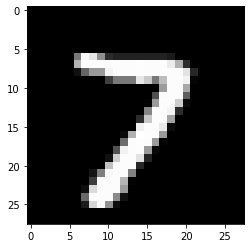

label is 7


In [47]:
# To Visualize a point in the dataset
index = 4000
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('Sample.pdf')
print('label is', y_train[index])

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.

### Multi-class Logistic Regression

What is the final value of the loss function and the value L2 of the weight ||W||2(Frobenius norm)?
- The final value of the loss function is 0.6152878477567971
- The Frobenius norm of the weight is 0.013285839414363869

In [77]:
from MLogistic import MLogistic

In [123]:
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

mlogistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = mlogistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929940455
Frobenius norm of grad= 269.5714938856629


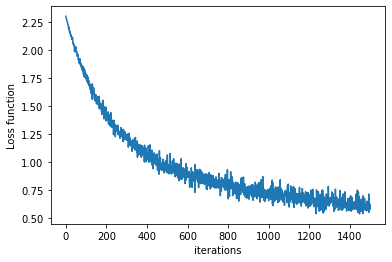

0.013285839414363869
0.6152878477567971


In [124]:
## Complete train_LR function in Logistic.py file 
loss_history, w = mlogistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(np.linalg.norm(w))
print(loss_history[1499])

In [125]:
# ================================================================ #
# YOUR CODE HERE:
#Complete predict function in Logistic.py file and compute the trainin error and the test error
# ================================================================ #

y_pred_test = mlogistic.predict(X_test)
num_missed = np.sum(y_test != y_pred_test)
print('The percentage of misclassified points in the test data for logistic regression is {}%.' \
      .format(100 * num_missed / (X_test.shape[0])))

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


The percentage of misclassified points in the test data for logistic regression is 13.04%.


In [ ]:
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(0,len(reg)):
    pass
    
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# as a function of number of classifiers T for Adaboost Algorithm. 
# ================================================================ #

#Initialize

for t in range(0,T):
    #Train decision Tree
    
    #Compute error
    
    #Compute \alpha
    
    #Update weights
    
    #Predict using Last t classifiers
    
    #compute test error and train error
    
# Plot test error and train error in the same plot vs T

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
